In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-diseaseuci/heart.csv


'''
HeartDiseaseUCI is a dataset widely used for predictive modeling and analysis in the field of cardiovascular health. It comprises 303 instances with 14 attributes covering demographic, clinical, and risk factor variables, with a binary target indicating the presence or absence of heart disease. Originally sourced from the Cleveland Clinic Foundation, this dataset offers valuable insights into the factors contributing to heart disease, aiding researchers, clinicians, and data scientists in developing robust predictive models and understanding the underlying patterns associated with this prevalent and life-threatening condition.
'''

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the csv file

In [5]:
df=pd.read_csv('/kaggle/input/heart-diseaseuci/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
#Number of rows and columns in the dataset
df.shape

(303, 14)

In [7]:
#Partitioning of features and target variable
X=df.drop(['target'],axis=1)
y=df['target']
X.shape,y.shape

((303, 13), (303,))

In [8]:
#Separating the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y)
X_train.shape,X_test.shape

((227, 13), (76, 13))

In [9]:
#Using a Decision Tree Classifier with default parameters to fit the training data
from sklearn.tree import DecisionTreeClassifier

Dtc=DecisionTreeClassifier(random_state=0)
Dtc.fit(X_train,y_train)

#Predicting the target variable using Decision Tree Classifier trained model on test dataset
y_pred_test=Dtc.predict(X_test)


In [16]:
#Predicting the target variable using Decision Tree Classifier trained model on train dataset
y_pred_train=Dtc.predict(X_train)

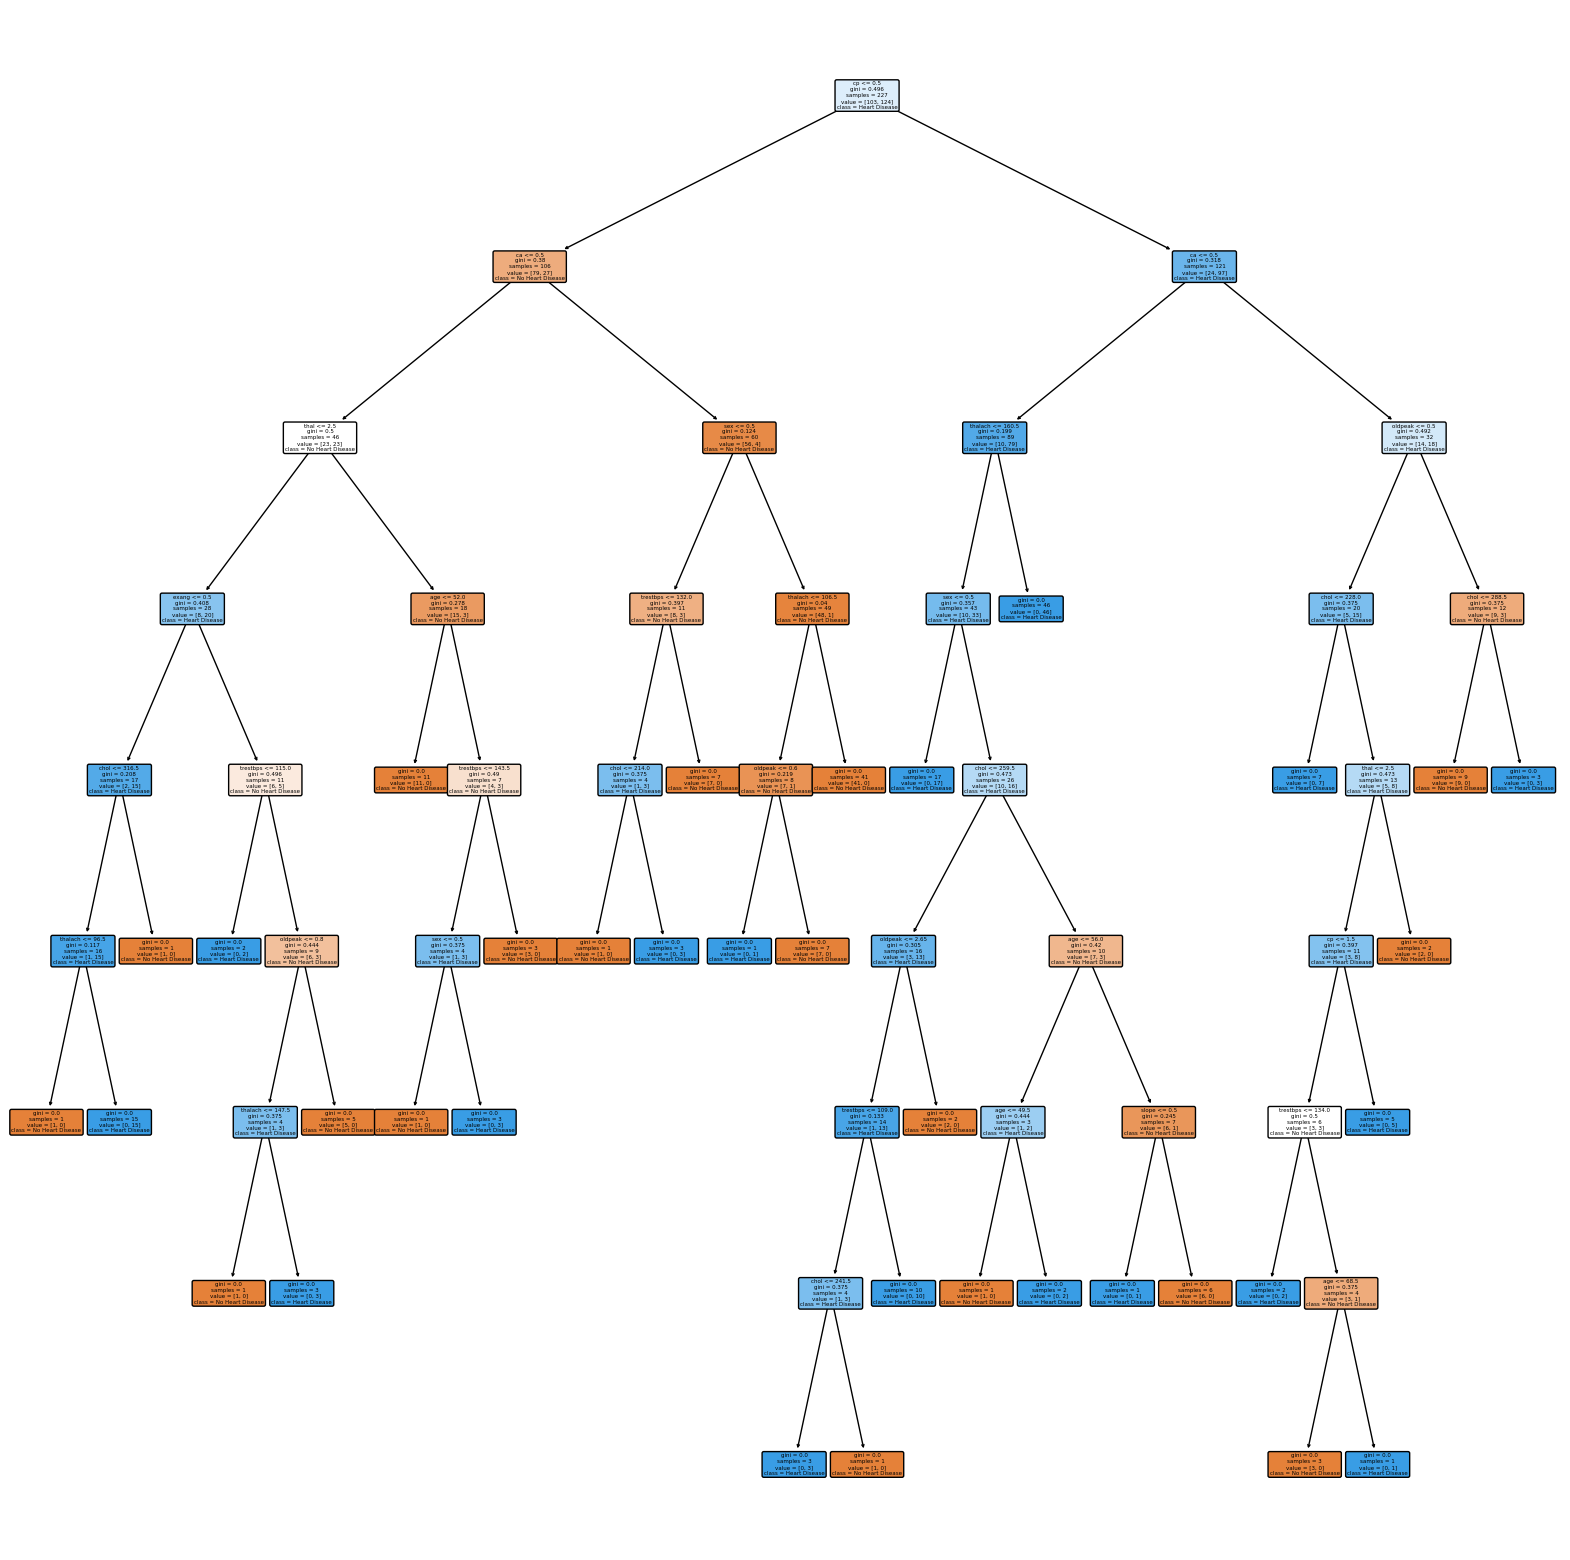

In [18]:
#Visualizing the decision tree.

from sklearn import tree

plt.rcParams['figure.figsize']=(20,20)
classes=['No Heart Disease','Heart Disease']
tree.plot_tree(Dtc,feature_names=X.columns,class_names=classes,filled=True,rounded=True)
plt.show()

In [12]:
# writing a function for calculating the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
def plot_confusionmatrix(y_train,y_pred,dom):
    print(f'{dom} Confusion Matrix')
    cm=confusion_matrix(y_train,y_pred)
    sns.heatmap(cm,annot=True, xticklabels=classes,yticklabels=classes,
                cmap='Blues',fmt='g'
               )
    plt.tight_layout()
    plt.show()

In [13]:
y_train.value_counts()

target
1    124
0    103
Name: count, dtype: int64

train score 1.0
test score 0.7763157894736842
Train Confusion Matrix


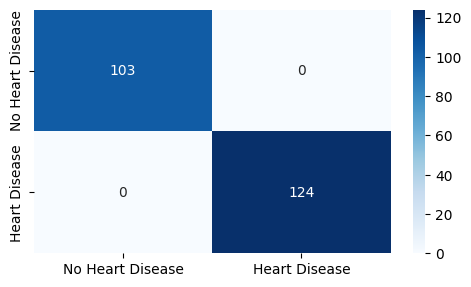

Test Confusion Matrix


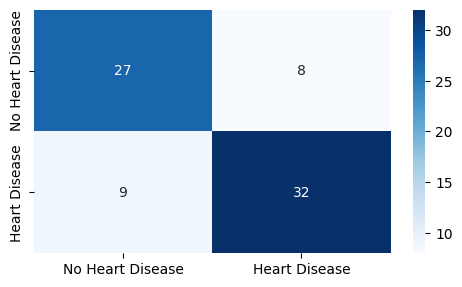

In [20]:
# visualizing the confusion matrices and calculating accuracy score for both training and testing datasets
plt.rcParams['figure.figsize']=(5,3)
print(f'train score {accuracy_score(y_train,y_pred_train)}')
print(f'test score {accuracy_score(y_test,y_pred_test)}')
plot_confusionmatrix(y_train,y_pred_train,dom='Train')
plot_confusionmatrix(y_test,y_pred_test,dom='Test')

In [21]:
#GridSearchCV is being initialized to perform hyperparameter tuning for a DecisionTreeClassifier, 
#exploring various combinations of maximum depth, minimum samples split, and minimum samples leaf parameters.
from sklearn.model_selection import GridSearchCV

params={'max_depth':[2,4,6,8,10,12],
        'min_samples_split':[2,3,4],
        'min_samples_leaf':[1,2]}
gsc=GridSearchCV(estimator=Dtc,param_grid=params)
gsc.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [22]:
#Accessing the best estimator from a grid search object.
gsc.best_estimator_

DecisionTreeClassifier(max_depth=8, random_state=0)

train score 1.0
test score 0.7763157894736842
Train Confusion Matrix


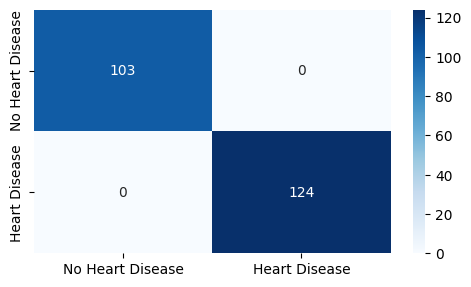

Test Confusion Matrix


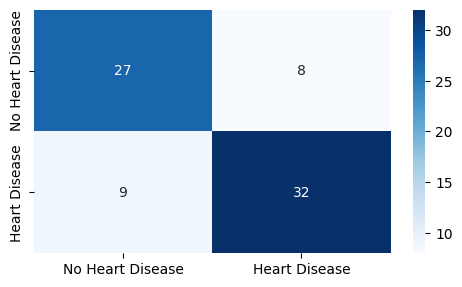

In [23]:
# visualizing the confusion matrices and calculating accuracy score for both training and testing datasets
#using best estimators
model=gsc.best_estimator_
model.fit(X_train,y_train)
y_pred_test1=model.predict(X_test)
y_pred_train1=model.predict(X_train)

plt.rcParams['figure.figsize']=(5,3)
print(f'train score {accuracy_score(y_train,y_pred_train1)}')
print(f'test score {accuracy_score(y_test,y_pred_test1)}')
plot_confusionmatrix(y_train,y_pred_train1,dom='Train')
plot_confusionmatrix(y_test,y_pred_test1,dom='Test')

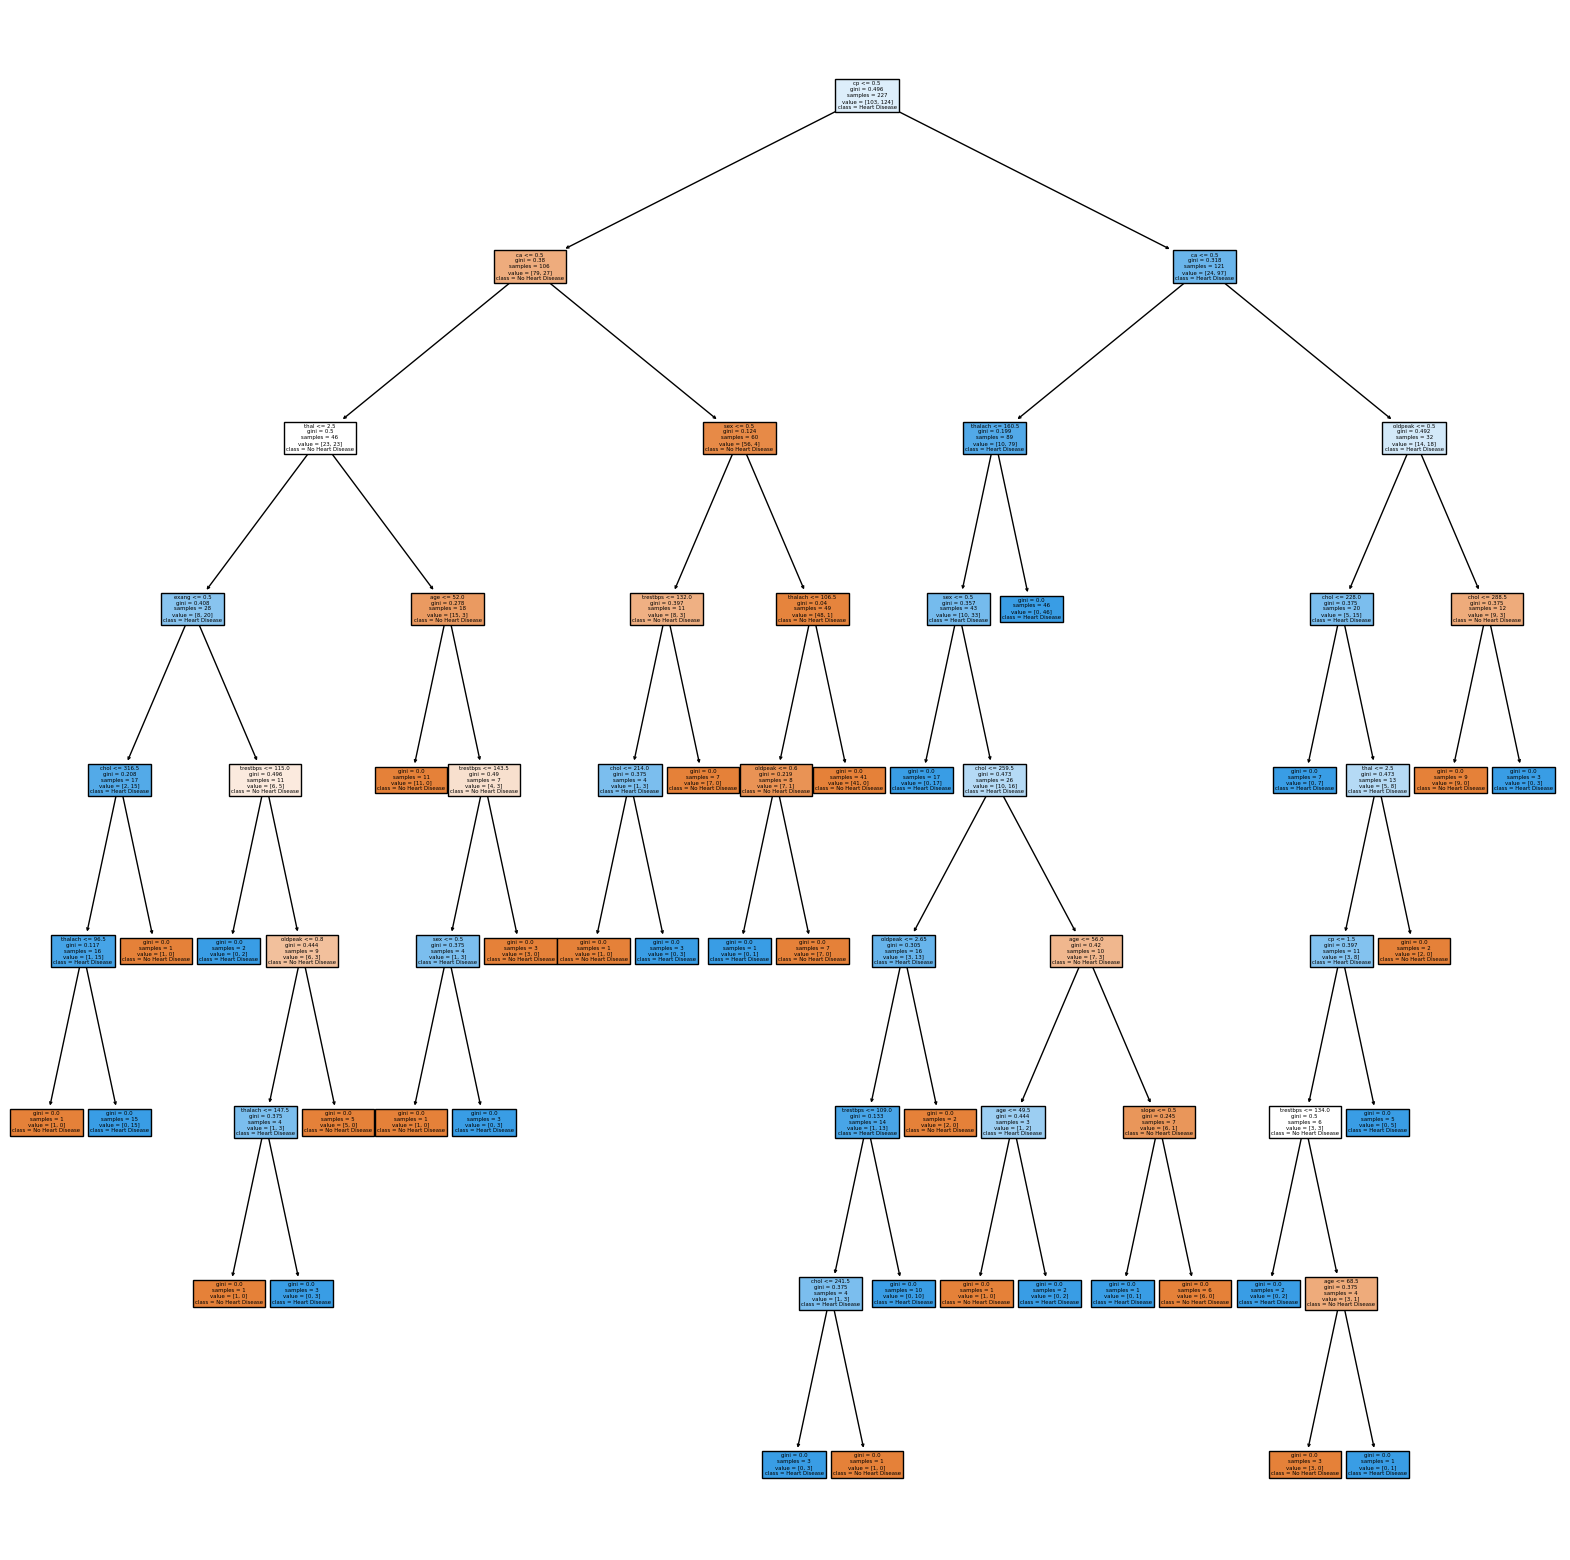

In [24]:
#visualizing the decision tree

plt.rcParams['figure.figsize']=(20,20)
tree.plot_tree(model,feature_names=X_train.columns,class_names=classes,filled=True)
plt.show()

## pruning

In [26]:
#Calculating cost-complexity pruning path to determine the optimal alpha values for decision tree pruning.
path=Dtc.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print(ccp_alphas)

[0.         0.00409062 0.00431538 0.00587372 0.00631424 0.00640769
 0.00660793 0.00660793 0.00660793 0.00690829 0.00770925 0.00777403
 0.00871045 0.00882706 0.01076923 0.01288069 0.01817181 0.02192304
 0.02894902 0.04307761 0.14891635]


In [27]:
# Training Decision Tree for every alpha values and storing them in Dtcs
Dtcs=[]
for ccp_alpha in ccp_alphas:
    Dtc1=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    Dtc1.fit(X_train,y_train)
    Dtcs.append(Dtc1)

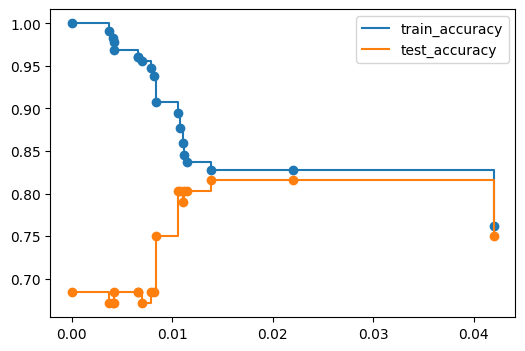

In [22]:
#Plotting training and testing accuracy against ccp_alphas to visualize model performance and overfitting.
train_acc=[]
test_acc=[]
plt.rcParams['figure.figsize']=(6,4)

Dtcs=Dtcs[:-1]
ccp_alphas=ccp_alphas[:-1]
for c in Dtcs:
    y_pred_train=c.predict(X_train)
    y_pred_test=c.predict(X_test)
    train_acc.append(accuracy_score(y_train,y_pred_train))
    test_acc.append(accuracy_score(y_test,y_pred_test))
    
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle='steps-post')
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle='steps-post')
plt.legend()
plt.show()

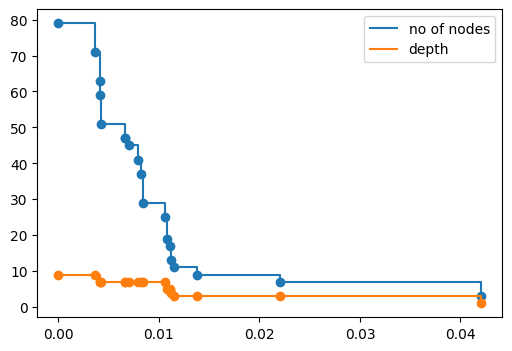

In [23]:
# Visualizing the relationship between cost complexity pruning alphas and node counts, as well as depth

node_counts=[Dtc.tree_.node_count for Dtc in Dtcs]
depth=[Dtc.tree_.max_depth for Dtc in Dtcs]

plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle='steps-post')
plt.plot(ccp_alphas,depth,label='depth',drawstyle='steps-post')
plt.legend()
plt.show()

Train score0.8281938325991189
Test score0.8157894736842105
Train Confusion Matrix


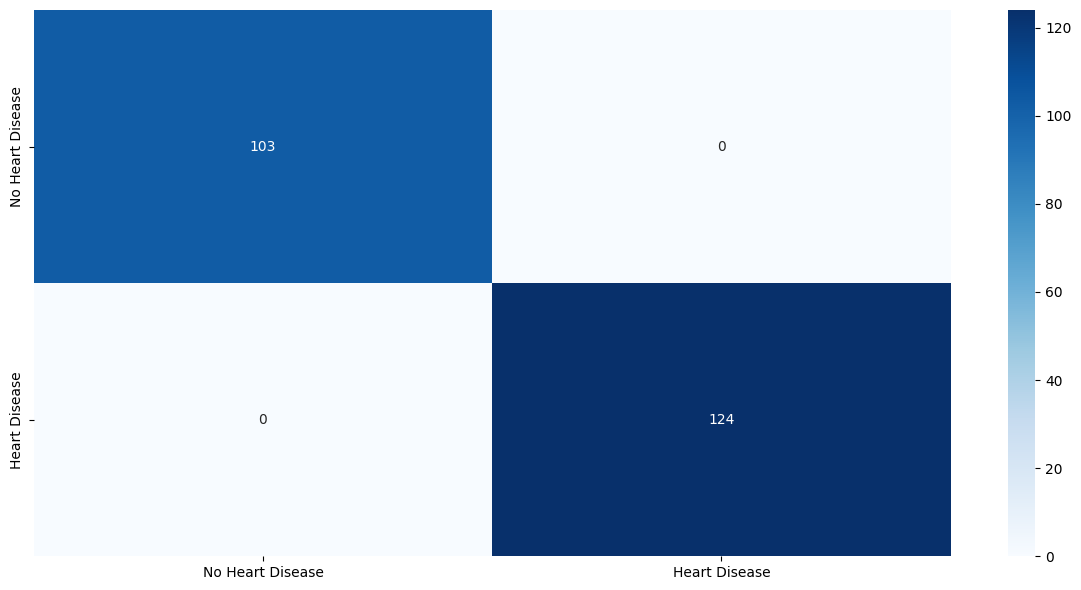

Test Confusion Matrix


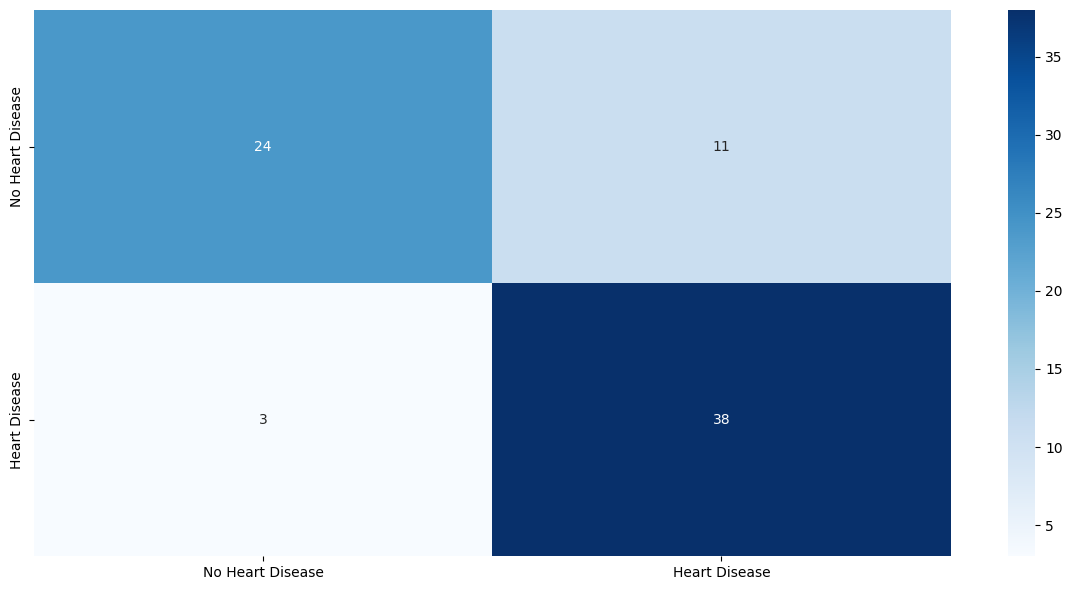

In [33]:
#Training a Decision Tree Classifier with a specific random state and cost complexity pruning alpha value.
Dtc_=DecisionTreeClassifier(random_state=0,ccp_alpha=0.02)
Dtc_.fit(X_train,y_train)
y_pred_train2=Dtc_.predict(X_train)
y_pred_test2=Dtc_.predict(X_test)

print(f'Train score{accuracy_score(y_train,y_pred_train2)}')
print(f'Test score{accuracy_score(y_test,y_pred_test2)}')
plot_confusionmatrix(y_train,y_pred_train,dom='Train')
plot_confusionmatrix(y_test,y_pred_test2,dom='Test')
plt.rcParams['figure.figsize']=[12,6]

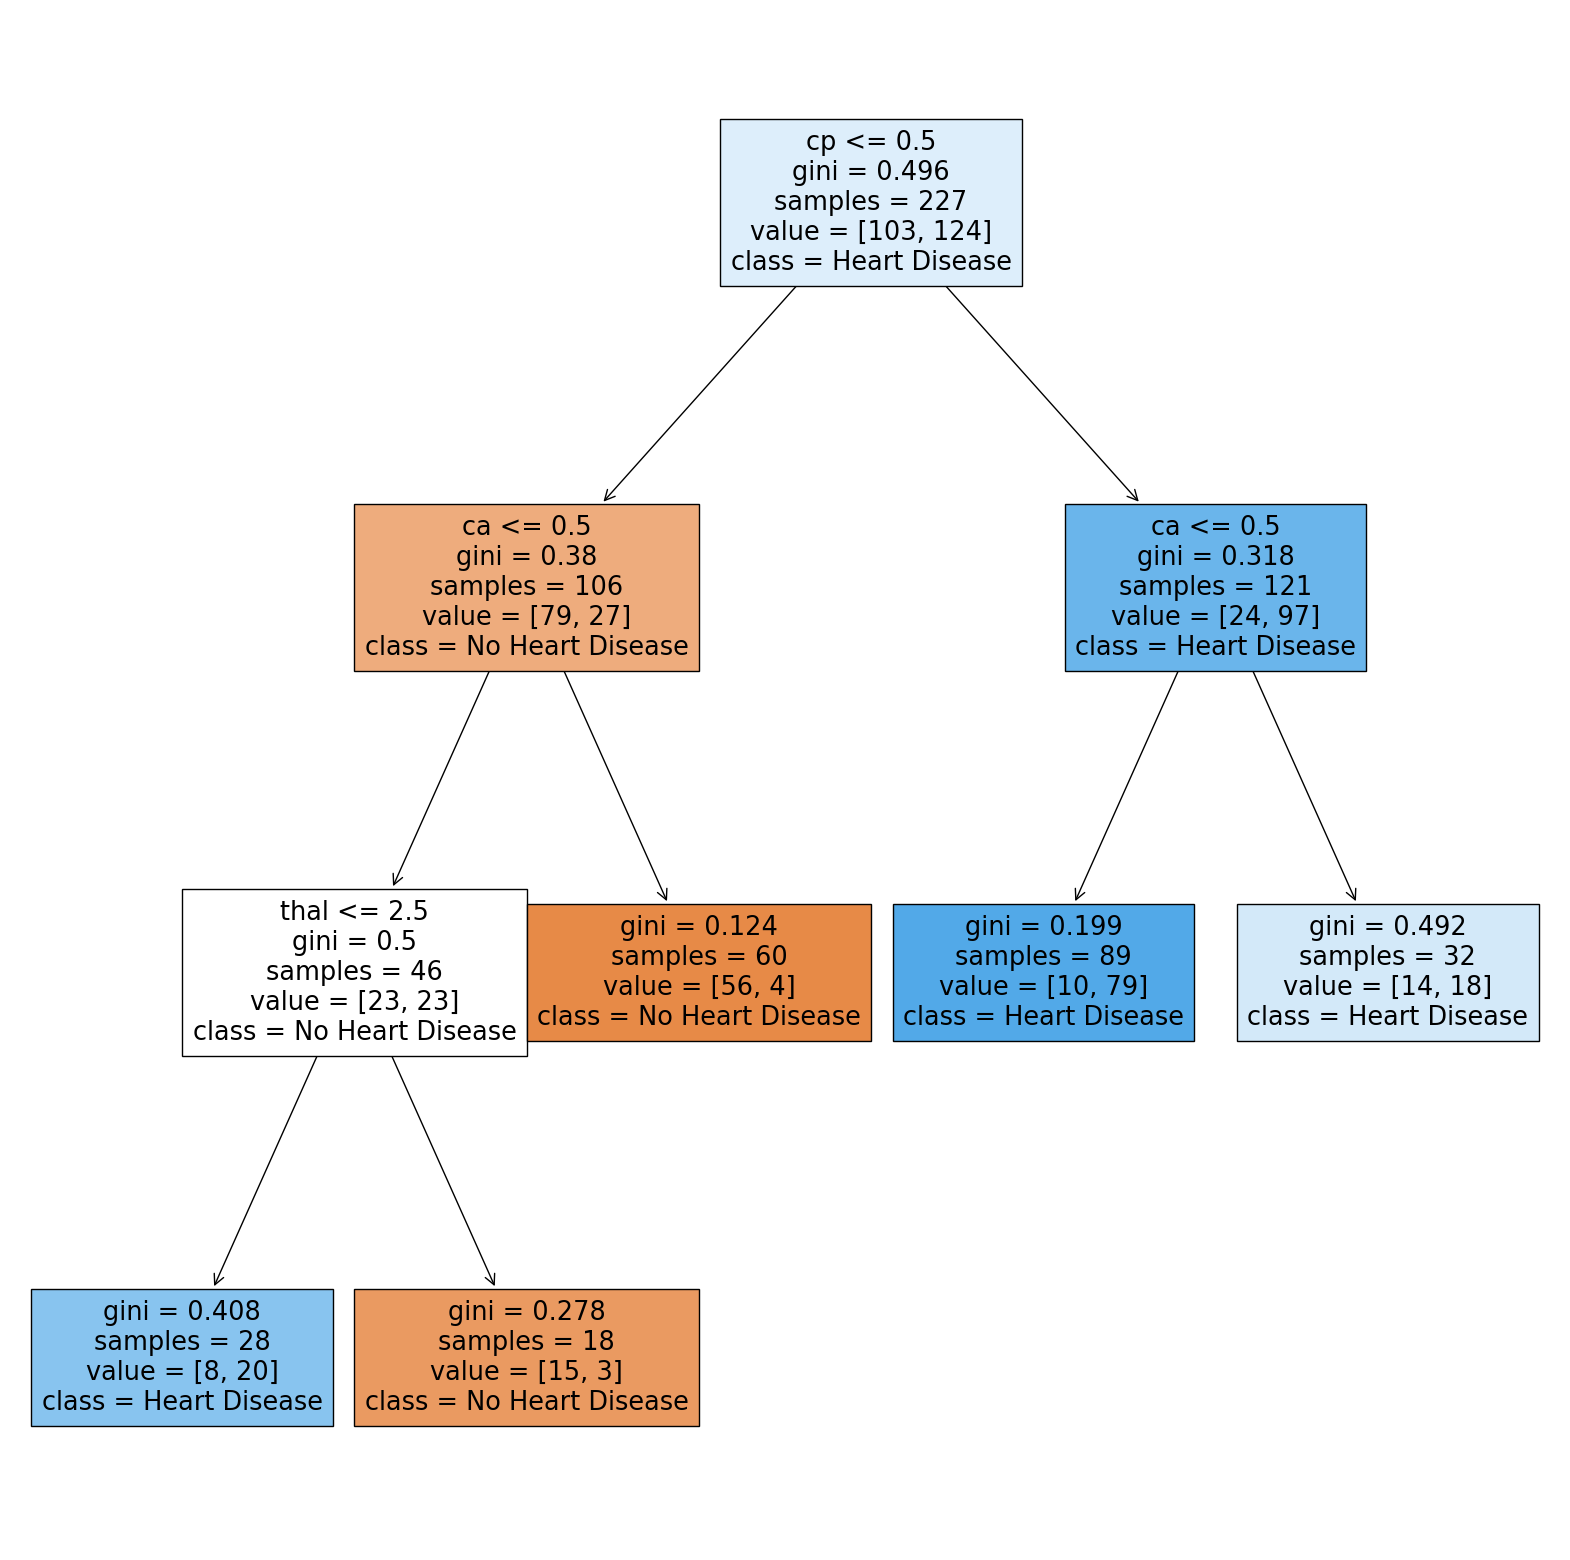

In [30]:
#Visulalizing the Decision Tree
plt.rcParams['figure.figsize']=(20,20)
tree.plot_tree(Dtc_,feature_names=X.columns,class_names=classes,filled=True)
plt.show()